<a href="https://colab.research.google.com/github/Wanderer0074348/CustomerSegementationUsingAI/blob/main/ClusteringUsingFeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("data2.csv")
data2 = data
data3 = data

In [ ]:
data[['R score', 'F score', 'M score']] = np.log1p(data[['R score', 'F score', 'M score']])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[["R score","F score","M score"]])

In [ ]:
interaction_features = np.column_stack([
    scaled_features[:, 0] * scaled_features[:, 1],  # R score * F score
    scaled_features[:, 0] * scaled_features[:, 2],  # R score * M score
    scaled_features[:, 1] * scaled_features[:, 2]   # F score * M score
])

In [ ]:
interaction_features

array([[ 0.27736569,  0.30653449,  0.60359244],
       [ 1.05895882, -1.14307705, -0.61797936],
       [ 0.74552145,  0.82392324,  0.60359244],
       ...,
       [ 0.30265668, -0.32669817, -0.61797936],
       [ 1.05895882,  1.39695736,  0.75523414],
       [ 1.05895882, -1.14307705, -0.61797936]])

In [ ]:
engineered_features = np.hstack([scaled_features, interaction_features])

In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(engineered_features)
    score = silhouette_score(engineered_features, kmeans_model.labels_)
    silhouette_scores.append(score)
    print(f'K={k}, Silhouette Score={score}')

K=2, Silhouette Score=0.24132455002928002
K=3, Silhouette Score=0.27522601828849996
K=4, Silhouette Score=0.3846031616653388
K=5, Silhouette Score=0.44639859153268413
K=6, Silhouette Score=0.5460073895245247
K=7, Silhouette Score=0.5499103234731475
K=8, Silhouette Score=0.5650945169876811
K=9, Silhouette Score=0.5909334195444835
K=10, Silhouette Score=0.5985168077126755


In [ ]:
best_k = np.argmax(silhouette_scores) + 2
best_silhouette_score = silhouette_scores[best_k - 2]

In [ ]:
print(f'Best K: {best_k}, Best Silhouette Score: {best_silhouette_score}')

Best K: 10, Best Silhouette Score: 0.5985168077126755


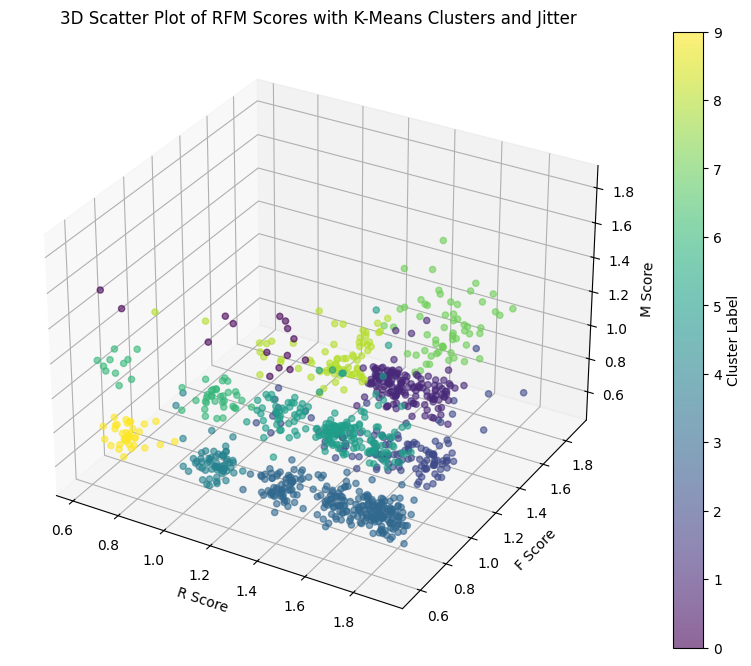

In [ ]:
kmeans_model = KMeans(n_clusters=10, random_state=42)
labels = kmeans_model.fit_predict(engineered_features)

jitter_strength = 0.05
data['R score'] += np.random.normal(0, jitter_strength, size=data.shape[0])
data['F score'] += np.random.normal(0, jitter_strength, size=data.shape[0])
data['M score'] += np.random.normal(0, jitter_strength, size=data.shape[0])


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(data['R score'], data['F score'], data['M score'], c=labels, cmap='viridis', marker='o', alpha=0.6)


ax.set_xlabel('R Score')
ax.set_ylabel('F Score')
ax.set_zlabel('M Score')
ax.set_title('3D Scatter Plot of RFM Scores with K-Means Clusters and Jitter')

color_bar = fig.colorbar(scatter, ax=ax, label='Cluster Label')

# Show the plot
plt.show()

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
def silhouette_plot(X,n_clusters):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([i/10 for i in range(-1, 11)])

    plt.show()

For n_clusters = 2, the average silhouette score is 0.342


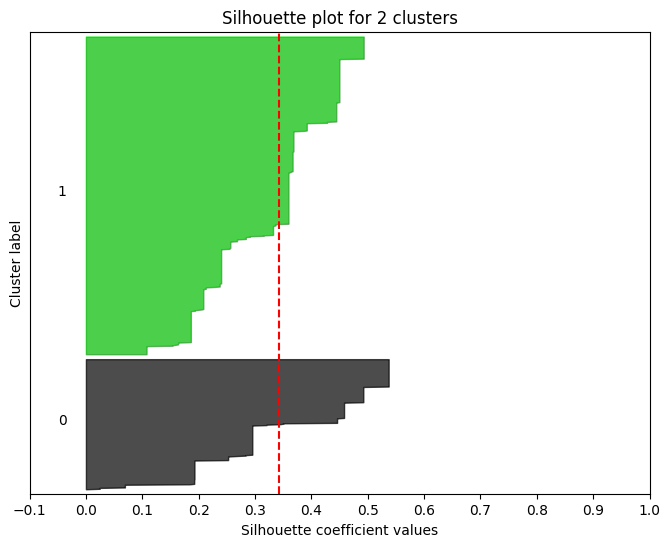

For n_clusters = 3, the average silhouette score is 0.324


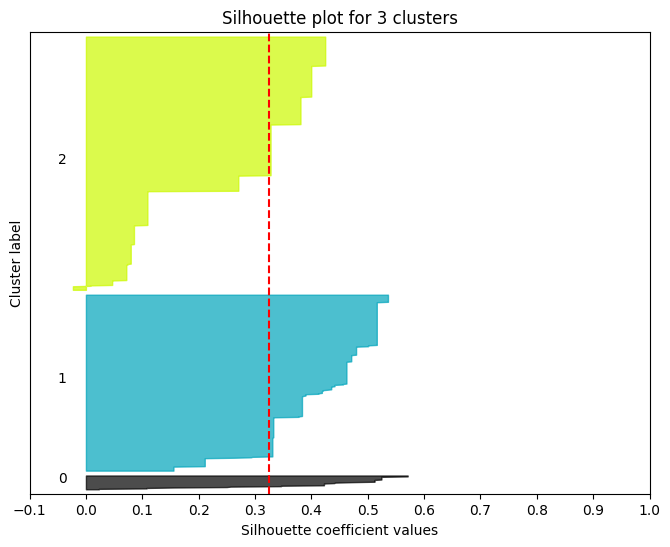

For n_clusters = 4, the average silhouette score is 0.268


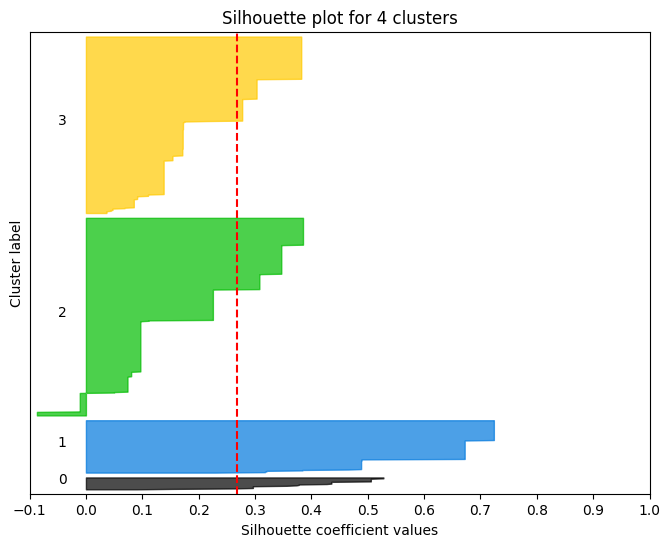

For n_clusters = 5, the average silhouette score is 0.421


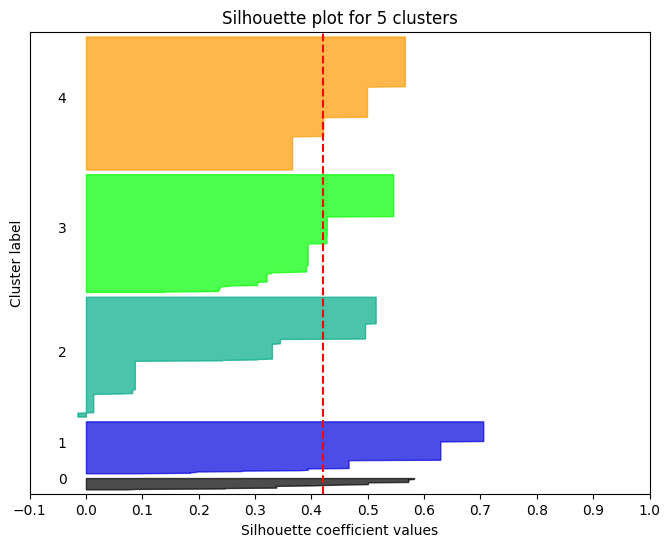

For n_clusters = 6, the average silhouette score is 0.442


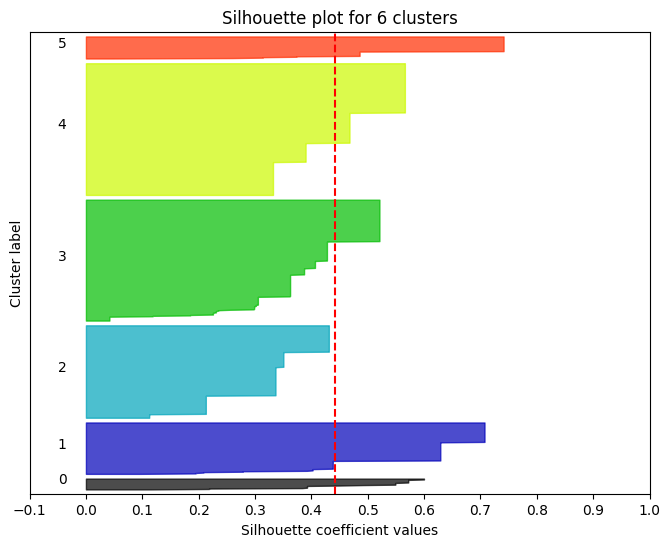

For n_clusters = 7, the average silhouette score is 0.480


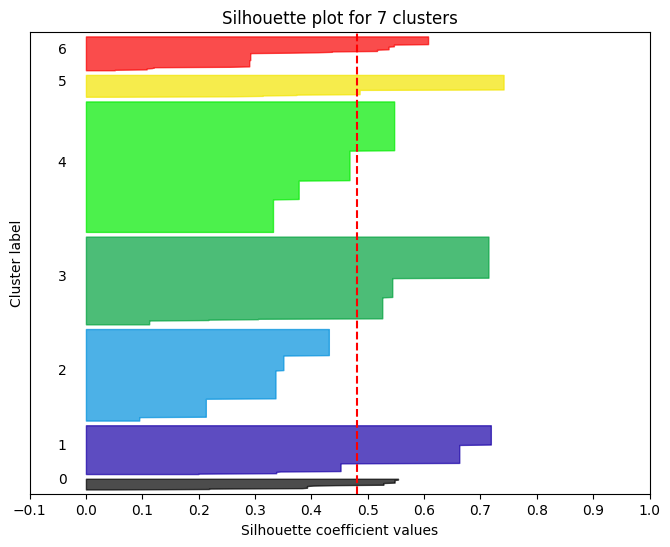

For n_clusters = 8, the average silhouette score is 0.577


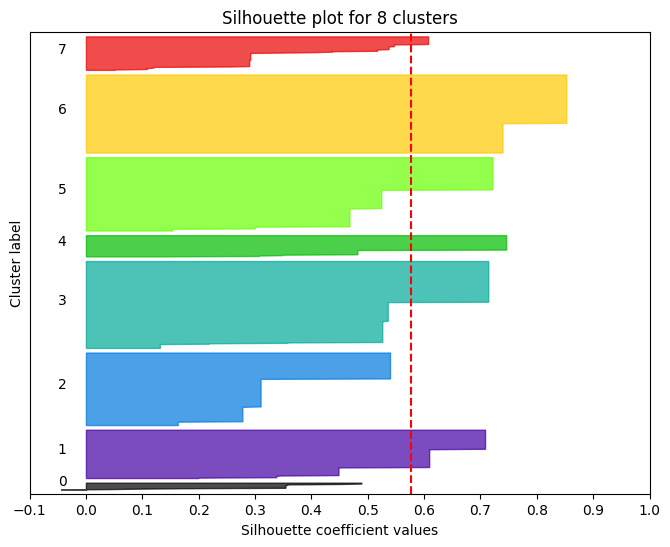

For n_clusters = 9, the average silhouette score is 0.591


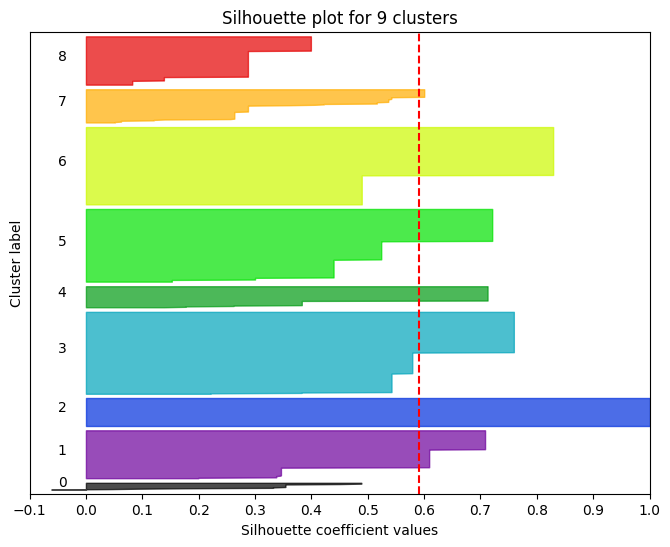

For n_clusters = 10, the average silhouette score is 0.637


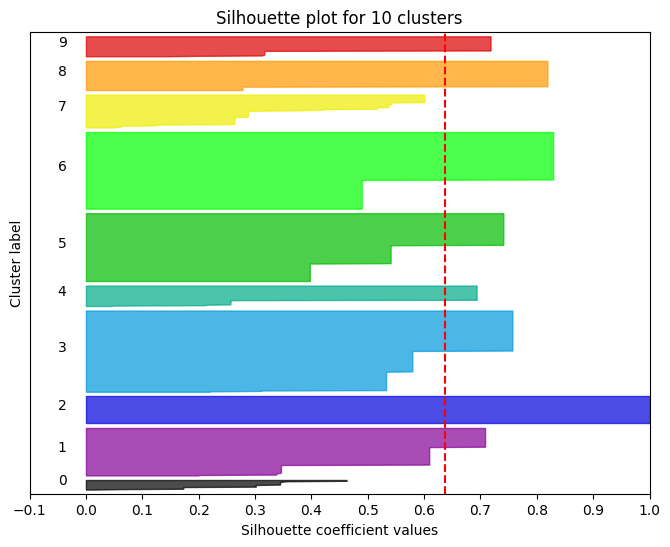

In [ ]:
for clusters in range(2,11):
  silhouette_plot(data[["R score","F score", "M score"]],clusters)